In [1]:
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

In [3]:
help(binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.
    
    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inve

In [7]:
p = 0.00203
n = 31000
k = 63
# probability of k success over n trials with probability p
print(f"Probability of {k} success over {n} trials with probability {p}: {binom.pmf(k,n,p)}")

Probability of 63 success over 31000 trials with probability 0.00203: 0.050244686644566605


In [8]:
x_values = np.arange(0,200,1)
#
# this creates a function in numpy that will be applied to an array objct in parallel and find the pmf value
vector_binom = np.vectorize(binom.pmf)
y_values = vector_binom(x_values,n,p)

Text(0, 0.5, 'Probability of event')

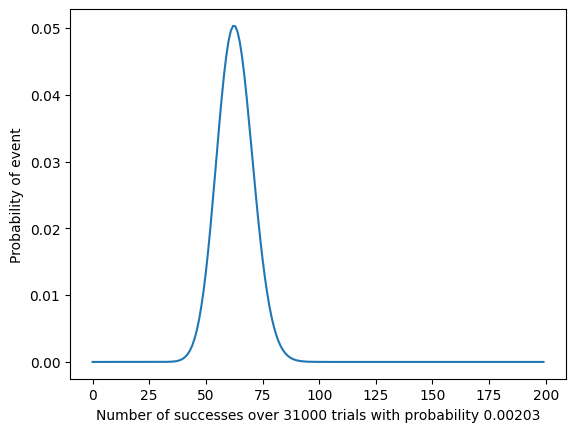

In [13]:
plt.plot(x_values,y_values)
plt.xlabel(f"Number of successes over {n} trials with probability {p}")
plt.ylabel(f"Probability of event")

In [15]:
help(binom.sf)

Help on method sf in module scipy.stats._distn_infrastructure:

sf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Survival function (1 - `cdf`) at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    sf : array_like
        Survival function evaluated at k.



In [29]:
#
# the fisher exact test is a form of inference from a 2x2 contingency table
# the scenario is as follows
# we have a control group and a treatment group of respectively 31000 and 31000 units
# the death cases in the control and treatment groups are respectively 63 and 39
# The fisher exact test assumes
#
# H0: Pi_control == Pi_treatment
# 
# H1: Pi_control != Pi_treatment
#
# the contingency table is below
# note: you can swap the rows and the fisher_Exact function will give you the correct p value
#      if you swap the columns you will get the opposite p-value (i.e. 1 - p_value)
# note: here ww use oe sided test so we need to set the alternative key word to 'less'
#       if you swap the columns and run a one side test, you can convert 'less' to 'greater'
#
table = [[30961,30937],
         [39,63]
        ]
table_swapped_rows = [[39,63],
                      [30961,30937]         
                    ]
table_swapped_rows_and_columns = [[63,39],
                                  [30937,30961]         
                                 ]
from scipy.stats import fisher_exact
help(fisher_exact)

Help on function fisher_exact in module scipy.stats._stats_py:

fisher_exact(table, alternative='two-sided')
    Perform a Fisher exact test on a 2x2 contingency table.
    
    The null hypothesis is that the true odds ratio of the populations
    underlying the observations is one, and the observations were sampled
    from these populations under a condition: the marginals of the
    resulting table must equal those of the observed table. The statistic
    returned is the unconditional maximum likelihood estimate of the odds
    ratio, and the p-value is the probability under the null hypothesis of
    obtaining a table at least as extreme as the one that was actually
    observed. There are other possible choices of statistic and two-sided
    p-value definition associated with Fisher's exact test; please see the
    Notes for more information.
    
    Parameters
    ----------
    table : array_like of ints
        A 2x2 contingency table.  Elements must be non-negative integers.

In [32]:
print(f"Result of fisher exact test (one side: less) on table:                             {fisher_exact(table,alternative='less')}")
print("-------")
print(f"Result of fisher exact test (one side: less) on table with swapped rows:           {fisher_exact(table_swapped_rows,alternative='less')}")
print("-------")
print(f"Result of fisher exact test (one side: less) on table_swapped rows and columns:    {fisher_exact(table_swapped_rows_and_columns,alternative='less')}")
print("-------")
print(f"Result of fisher exact test (one side: greater) on table_swapped rows and columns: {fisher_exact(table_swapped_rows_and_columns,alternative='greater')}")



Result of fisher exact test (one side: less) on table:                             SignificanceResult(statistic=1.616637782490968, pvalue=0.9935765924872794)
-------
Result of fisher exact test (one side: less) on table with swapped rows:           SignificanceResult(statistic=0.6185677526719483, pvalue=0.011094091841433758)
-------
Result of fisher exact test (one side: less) on table_swapped rows and columns:    SignificanceResult(statistic=1.616637782490968, pvalue=0.9935765924872794)
-------
Result of fisher exact test (one side: greater) on table_swapped rows and columns: SignificanceResult(statistic=1.616637782490968, pvalue=0.011094091841433758)


In [4]:
#
# here we copmute the z-score from the standard normal gaussian..
# same as reading the value from a table
from scipy.stats import norm
help(norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [5]:
z = -3.0268
p_value = norm.cdf([z])
print(f"P value for Z score: {z} is {p_value}")

P value for Z score: -3.0268 is [0.00123579]


In [8]:
# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.
from scipy.stats import ttest_rel

help(ttest_rel)


Help on function ttest_rel in module scipy.stats._stats_py:

ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the t-test on TWO RELATED samples of scores, a and b.
    
    This is a test for the null hypothesis that two related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.
        
        - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
          which the  statistic is computed, the

In [17]:
a_values = [6.1, 7.0, 8.2, 7.6, 6.5, 7.8, 6.9, 6.7, 7.4, 5.8] # hours slept under treatment
b_values = [5.2, 7.9, 3.9, 4.7, 5.3, 4.8, 4.2, 6.1, 3.8, 6.3] # hours slept with placebo

result = ttest_rel(a_values,b_values, alternative='greater')
flipped_data_result = ttest_rel(b_values,a_values, alternative='greater')
flipped_data_flipped_side_result = ttest_rel(b_values,a_values, alternative='less')
print(f"Values from a vector: {a_values}")
print(f"Values from b vector: {b_values}")
print("---------")
print(f" T-TEST Results (one sided/greater): {result}")
print("---------")
print(f" T-TEST Results for flipped data(one sided/greater): {flipped_data_result}")
print("---------")
print(f" T-TEST Results for flipped data(one sided/less): {flipped_data_flipped_side_result}")

Values from a vector: [6.1, 7.0, 8.2, 7.6, 6.5, 7.8, 6.9, 6.7, 7.4, 5.8]
Values from b vector: [5.2, 7.9, 3.9, 4.7, 5.3, 4.8, 4.2, 6.1, 3.8, 6.3]
---------
 T-TEST Results (one sided/greater): TtestResult(statistic=3.1835383022188735, pvalue=0.005560692749284678, df=9)
---------
 T-TEST Results for flipped data(one sided/greater): TtestResult(statistic=-3.1835383022188735, pvalue=0.9944393072507154, df=9)
---------
 T-TEST Results for flipped data(one sided/lower): TtestResult(statistic=-3.1835383022188735, pvalue=0.005560692749284678, df=9)


In [18]:
from scipy.stats import probplot
help(probplot)

Help on function probplot in module scipy.stats._morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e.

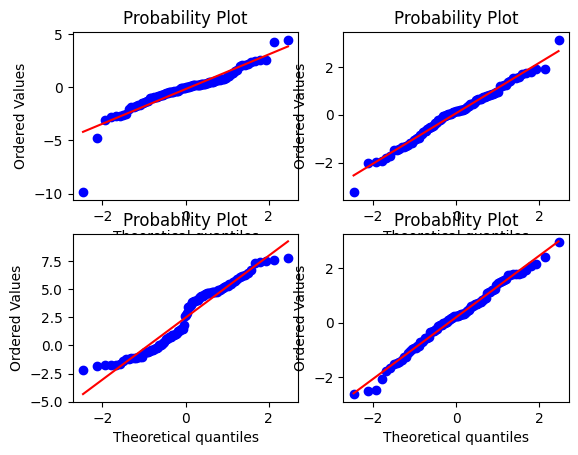

In [24]:
nsample = 100
from scipy import stats
rng = np.random.default_rng()
    
#    A t distribution with small degrees of freedom:
ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample, random_state=rng)
res = stats.probplot(x, plot=plt)
    
#    A t distribution with larger degrees of freedom:
ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample, random_state=rng)
res = stats.probplot(x, plot=plt)
    
#    A mixture of two normal distributions with broadcasting:   
ax3 = plt.subplot(223)
x = stats.norm.rvs(loc=[0,5], scale=[1,1.5],
                    size=(nsample//2,2), random_state=rng).ravel()
res = stats.probplot(x, plot=plt)
    
#    A standard normal distribution:
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=nsample, random_state=rng)
res = stats.probplot(x, plot=plt)
  
#    Show the results with Matplotlib:   
plt.show()

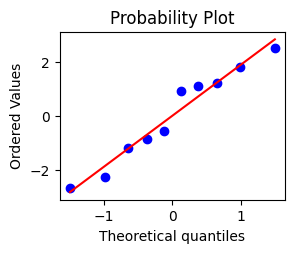

In [31]:
#
# note this is not really a qq plot.. it's more like a pp plot and
# it maps probability from one dataset against a well knwon probability distribution (default=normal)
#
# note that the data is the difference between the 2 data sets in our example and
#      it is normalized, i.e. the mean is removed
diff_data = np.array(a_values) - np.array(b_values)
normalized_diff_data = diff_data - diff_data.mean()
normalized_diff_data
ax1 = plt.subplot(221)
res = stats.probplot(normalized_diff_data, plot=plt)
    
#    Show the results with Matplotlib:   
plt.show()

In [20]:
import math
from scipy.stats import chi2
#
#
# LIKELIHOOD RATIO TEST
# This test can be used for all test statistics
# it's based on the ratio between the ratio between the probability to see the data under H0 (N) 
# and the probability to see the data under the MLE (Maximum Liklelihood estimator) for the model distribution
#          N 
# L(X) = -----
#          D
# L(X) is always between 0,1 because the MLE is computed including H0 as possible value for the parameter 
#      so the resulting D is always D >= N
#
# to get to a pivota, weel knwon distribution from L(X) we consider:
# 
# T = -2 * log(L(X))
# 
# that can be proven to follow a Chi-square with d degree of freedom where d is dim(Theta) - dim(Theta under H0)
# Let's have a look at an example:
#
# 1) People offered mmamography vs rate of deaths for breast cancer
# 
#  H0: p_control = p_treatment
#  H1: p_control > p_treatment
#
# 2) the model for the data is binomial
#    MLE for binomial = # success/ # total
#
# p is the probability to die for breast cancer
# N control   = 31000, deaths = 63
# N treatment = 31000, deaths = 39
#
# H0 p_control = p_treatment = p
# Note: here dim(theta) == 1 because we have a single parameter 
k1 = 63 
k2 = 39
n1 = 31000
n2 = 31000
k = k1 + k2
n = 31000+31000
p =  k / n
p_control_data = binom.pmf(k1,n1,p)
p_treatment_data = binom.pmf(k2,n2,p)
H0_data_p = p_control_data * p_treatment_data
print(f"under H0, p_treatment = p_control = {p} . Probability of data see is : {p_control_data} * {p_treatment_data} = {H0_data_p}" )

#
# H1 p_control != p_treatment 
# Note: 
#  - here dim(theta) == 2 because we have 2 possible parameters for the data
#  - the total probability becomes the product of the 2 binomial for control/treatment (as they are independent)
p1 =  k1 / n1
p2 =  k2 / n2
p_control_data = binom.pmf(k1,n1,p1)
p_treatment_data = binom.pmf(k2,n2,p2)
H1_data_p = p_control_data * p_treatment_data
print(f"under H1, p_treatment = {p2} p_control = {p1}. Probability of data see is : {p_control_data} * {p_treatment_data} = {H1_data_p}" )
print("---------")
Tn = - 2 * math.log(H0_data_p/H1_data_p)
print(f"Test statistic value is: {Tn}")



under H0, p_treatment = p_control = 0.0016451612903225807 . Probability of data see is : 0.013492637821243925 * 0.01367402451255428 = 0.0001844986603067064
under H1, p_treatment = 0.0012580645161290322 p_control = 0.002032258064516129. Probability of data see is : 0.05024664607042506 * 0.06378567544145829 = 0.003205016258269958
---------
Test statistic value is: 5.709660479762173


In [29]:
#
# the probability to get a result as extreme or more is given by the are on the right on Tn value which we get from the cdf:
print(f"p-value for Tn: {Tn} is: {1 - chi2.cdf(Tn,df=1) }")

p-value for Tn: 5.709660479762173 is: 0.016871802195942753


In [41]:
# FAMILY WISE CORRECTION ERROR (FWER)
#
# Very quick exercise to compare Bonferroni Correction vs Holm-Bonferroni
# we assume we have 4 tests, alpha = 0.05 and realted p-values here:
alpha = 0.05
test_p_values = [('H1',0.01),('H2',0.04),('H3',0.03),('H4',0.005)]
#
# Bonferroni correction:
# Each test p-value result needs to be lower alpha/(# of tests) to reject Null Hypothesis
corrected_alpha = alpha / len(test_p_values)
for (test,p_value) in test_p_values:
    if p_value <= corrected_alpha:
        print(f"Bonferroni reject Test         : {test} - p-value: {p_value:5}, alpha={alpha:4}, corrected_alpha={corrected_alpha}")
    else:    
        print(f"Bonferroni fail to reject Test : {test} - p-value: {p_value:5}, alpha={alpha:4}, corrected_alpha={corrected_alpha}")        
#
# Holm-Bonferroni correction:
# test results need to be sorted so that the first has the lowest p-value and the last the highest p-value
# Each test (i) p-value result needs to be lower alpha/(# of tests + 1 - i) to reject Null Hypothesis
# so:
# - the 1st (ordered) test needs to have p_value < alpha/(# of tests)
# - the 2st (ordered) test needs to have p_value < alpha/(# of tests - 1)
# ...
# - the last (ordered) test needs to have p_value < alpha
print("-------------")
sorted_tests_p_values = sorted(test_p_values,key=lambda x: x[1])
for index,(test,p_value) in enumerate(sorted_tests_p_values):
    if (len(test_p_values) - index) * p_value <= alpha:
        print(f"Holm-Bonferroni reject Test         : {test} - p-value: {p_value:5}, alpha={alpha:4}, corrected_p={(len(test_p_values) - index) * p_value}")
    else:
        print(f"Holm-Bonferroni fail to reject Test : {test} - p-value: {p_value:5}, alpha={alpha:4}, corrected_p={(len(test_p_values) - index) * p_value}")       
        print("The process stops here")
        break


Bonferroni reject Test         : H1 - p-value:  0.01, alpha=0.05, corrected_alpha=0.0125
Bonferroni fail to reject Test : H2 - p-value:  0.04, alpha=0.05, corrected_alpha=0.0125
Bonferroni fail to reject Test : H3 - p-value:  0.03, alpha=0.05, corrected_alpha=0.0125
Bonferroni reject Test         : H4 - p-value: 0.005, alpha=0.05, corrected_alpha=0.0125
-------------
Holm-Bonferroni reject Test         : H4 - p-value: 0.005, alpha=0.05, corrected_p=0.02
Holm-Bonferroni reject Test         : H1 - p-value:  0.01, alpha=0.05, corrected_p=0.03
Holm-Bonferroni fail to reject Test : H3 - p-value:  0.03, alpha=0.05, corrected_p=0.06
The process stops here


In [46]:
# FALSE DISCOVERY RATE (FDR)
#
# Very quick exercise to implement Benjamin-Hochberg correction:
#
# we assume we have 4 tests, alpha = 0.05 and realted p-values here:
alpha = 0.05
test_p_values = [('H1',0.01),('H2',0.04),('H3',0.03),('H4',0.005)]
#
# The test results need to be sorted so that the first has the lowest p-value and the last the highest p-value
# For each test (i) p-value ew check: 
#
#    (# of tests) * p-value(i) / i <= alpha 
#
# we find the max (i) for which this is true and all j tests j <= i will reject their H0
sorted_tests_p_values = sorted(test_p_values,key=lambda x: x[1])
max_index = 0
for index,(test,p_value) in enumerate(sorted_tests_p_values):
    if (len(test_p_values) * p_value) / (index + 1) <= alpha:
        print(f"Test {index + 1 }: {test} - p_value: {p_value:5} - corrected_p_value: {(len(test_p_values) * p_value) / (index + 1)} < alpha {alpha}, so updating max_index")
        max_index = index + 1
for index,(test,_) in enumerate(sorted_tests_p_values):
    if index <= max_index:
        print(f"Test: {test} - Rejects H0")
    else:
        print(f"Test: {test} - Fails to rejects H0")

Test 1: H4 - p_value: 0.005 - corrected_p_value: 0.02 < alpha 0.05, so updating max_index
Test 2: H1 - p_value:  0.01 - corrected_p_value: 0.02 < alpha 0.05, so updating max_index
Test 3: H3 - p_value:  0.03 - corrected_p_value: 0.04 < alpha 0.05, so updating max_index
Test 4: H2 - p_value:  0.04 - corrected_p_value: 0.04 < alpha 0.05, so updating max_index
Test: H4 - Rejects H0
Test: H1 - Rejects H0
Test: H3 - Rejects H0
Test: H2 - Rejects H0
